Prediksi Penjualan Gula dengan Fuzzy Logic 
====================

<div class="alert alert-info">
	<p>Nama : Muhammad Rizallul Hakim</p>
	<p>NIM  : 09011381722085</p>
</div>

Penjualan merupakan aspek penting dalam
perusahaan yang memperngaruhi keuntungan perusahaan. Jumlah penjualan yang sesuai dengan
permintaan toko dan stok kemas yang ada di gudang tentunya akan mencapai target pasar yang telah
ditentukan dan menaikkan potensi keuntungan perusahaan. Akan tetapi, dalam kenyataannya perhitungan
dalam penjualan selalu dilakukan dengan manual sehingga mempengaruhi kebijakan perusahaan dalam
penjualan. Sehingga, dibutuhkan suatu sistem yang dapat memprediksi jumlah produksi barang sesuai
dengan permintaan dan persediaan.

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

<div class="alert alert-warning">
  <h5>Fungsi program diatas :</h5>
<ol>
  <li>Memberikan deklarasi variabel np sebagai numpy.</li>
  <ul>
    <li>NumPy adalah modul untuk komputasi ilmiah dalam Python.</li>
  </ul><br>
  <li>Memberikan deklarasi variabel fuzz sebagai skfuzzy.</li>
  <ul>
    <li>Skfuzzy adalah Library kumpulan function fuzzy logic untuk bahasa Python.</li>
  </ul><br>
  <li>Memberikan deklarasi variabel ctrl sebagai fungsi control dari library skfuzzy.</li><br>
  <li>memberikan deklarasi variabel plt sebagai matplotlib.pyplot.</li>
  <ul>
    <li>Matplotlib adalah library Python 2D yang dapat menghasilkan plot dengan kualitas tinggi dalam berbagai format dan dapat digunakan di banyak platform.</li>
  </ul>
</ol>
</div>

----

<div class="alert alert-success">
<p>Input : Variabel Permintaan dibagi 3 yakni :</p>
	<ul>
		<li>Rendah</li>
		<li>Sedang</li>
		<li>Tinggi</li>
	</ul>
<p>Variabel Stok dibagi 3 yakni :</p>
	<ul>
		<li>Rendah</li>
		<li>Sedang</li>
		<li>Tinggi</li>
	</ul>
<p>Output : Variabel Penjualan dibagi 3 yakni :</p>
	<ul>
		<li>Turun</li>
		<li>Sedang</li>
		<li>Naik</li>
	</ul>
</div>

Jumlah Permintaan mempunyai rentang nilai dari 0 - 363725

In [2]:
permintaan = ctrl.Antecedent(np.arange(0,363725,1000), 'permintaan')
permintaan_x =np.arange(0,367253,1000) #ploting

FUZZIFIKASI Jumlah Permintaan
==
Proses untuk mengubah variabel non numerik menjadi variabel non fuzzy (numerik) menjadi variabel fuzzy (linguistik)

Untuk jumlah Permintaan, fungsi keanggotaan dibagi menjadi 3 bagian :
$$ Banyaknya Permintaan $$
$$ Rendah = 1 - 72475$$
$$ Sedang = 1000 - 363725$$
$$ Tinggi = 72475 - 363725$$


Dengan fungsi keanggotaan Banyaknya permintaan

\begin{equation}
  permintaan['rendah'] = \mu Rendah(x)=\begin{cases}
    1, & \text{$x\leq1000$}.\\
    (72475 - x)/(72475-1000) , & \text{$1000 \leq x \leq 72475$}.\\
    0, & \text{$x\geq 72475$}.
  \end{cases}
  \\
  permintaan['sedang'] = \mu Sedang(x)=\begin{cases}
    0, & \text{$x\leq 1000$ atau $x\geq363725$}.\\
    (x - 1000)/(72475 - 1000) , & \text{$1000 \leq x \leq 72475$}.\\
    (363725 - x)/(363725 - 72475) , & \text{$72475 \leq x \leq 363725$}.\\
  \end{cases}
  \\
    permintaan['tinggi'] = \mu Tinggi(x)=\begin{cases}
    0, & \text{$x\leq 72475$}.\\
    (x - 72475)/(363725 - 72475) , & \text{$72475 \leq x \leq 363725$}.\\
    1, & \text{$x\geq 363725$}.
  \end{cases}
\end{equation}

In [3]:
permintaan['rendah']=fuzz.trapmf(permintaan.universe,[1,1,1000,72475])
permintaan['sedang']=fuzz.trimf(permintaan.universe,[1000,72475,363725])
permintaan['tinggi']=fuzz.trimf(permintaan.universe,[72475,363725,363725])

PLOTING MEMBERSHIP JUMLAH PERMINTAAN
====

<div class="alert alert-success">
	<p>Plotting fungsi keanggotaan $\mu Rendah(x)$.</p>
</div>

Fungsi Keanggotaan PermintaanRendah memiliki rentang nilai 1 - 72475

Text(0.5, 1.0, 'Permintaan Rendah')

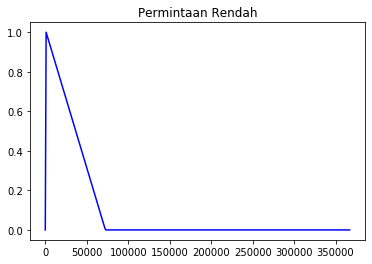

In [43]:
permintaan_rendah = fuzz.trapmf(permintaan_x,[1,1,1000,72475])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,4))
ax0.plot(permintaan_x,permintaan_rendah,'blue')
ax0.set_title('Permintaan Rendah')

<div class="alert alert-success">
	<p>Plotting fungsi keanggotaan $\mu Sedang(x)$.</p>
</div>

Fungsi Keanggotaan PermintaanSedang memiliki rentang nilai 1000 - 363725

Text(0.5, 1.0, 'Permintaan Sedang')

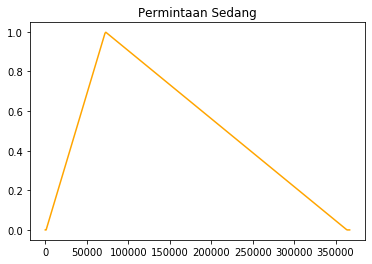

In [47]:
permintaan_sedang = fuzz.trimf(permintaan_x,[1000,72475,363725])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,4))
ax0.plot(permintaan_x,permintaan_sedang,'orange')
ax0.set_title('Permintaan Sedang')

<div class="alert alert-success">
	<p>Plotting fungsi keanggotaan $\mu Tinggi(x)$.</p>
</div>

Fungsi Keanggotaan PermintaanTinggi memiliki rentang nilai 72475 - 363725

Text(0.5, 1.0, 'Permintaan Tinggi')

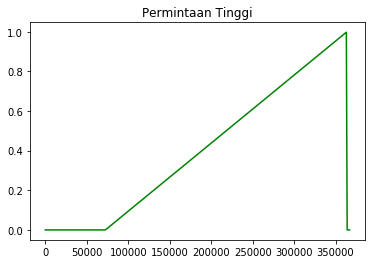

In [46]:
permintaan_tinggi = fuzz.trimf(permintaan_x,[72475,363725,363725])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,4))
ax0.plot(permintaan_x,permintaan_tinggi,'green')
ax0.set_title('Permintaan Tinggi')

<div class="alert alert-success">
	<p>Plotting ke empat fungsi keanggotaan banyaknya permintaan.</p>
</div>

C:\Users\FX505DY\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


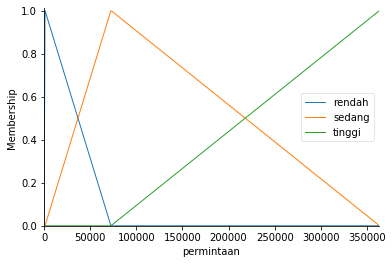

In [7]:
permintaan.view()

FUZZIFIKASI VARIABEL STOK
=====

In [48]:
stok = ctrl.Antecedent(np.arange(0,899755,10000), 'stok')
stok_x = np.arange(0,899755,1) #plotting

Pada variabel Stok kemas, terbagi menjadi 3 buah yaitu: 
$$Rendah : 1 - 545805$$
$$Sedang : 229000 - 899755$$
$$Tinggi : 545805 - 899755$$


Dengan fungsi keanggotaan Variabel Stok

\begin{equation}
  stok['rendah'] = \mu stokRendah(x)=\begin{cases}
    1, & \text{$x\leq229000$}.\\
    \left.(545805 - x) \,  \right/(545805 - 229000) , & \text{$229000 \leq x \leq 545805$}.\\
    0, & \text{$x\geq 545805$}.
  \end{cases}
  \\
    stok['sedang'] = \mu stokSedang(x)=\begin{cases}
    0, & \text{$x\leq 229000$ atau $x\geq899755$}.\\
    \left.(x - 229000)\, \right/(545805 - 229000) , & \text{$229000 \leq x \leq 545805$}.\\
    \left.(899755 - x)\, \right/(899755 - 545805) , & \text{$545805 \leq x \leq 899755$}.\\
  \end{cases}
  \\
  stok['tinggi'] = \mu stokTinggi(x)=\begin{cases}
    0, & \text{$x \leq 545805$}.\\
    \left.(x - 545805) \,  \right/(750 - 545805) , & \text{$545805 \leq x \leq 899755$}.\\
    1, & \text{$x\geq 899755$}.
  \end{cases}
\end{equation}



In [50]:
stok['turun']=fuzz.trapmf(stok.universe,[0,1,229000,545805])
stok['sedang']=fuzz.trimf(stok.universe,[229000,545805,899755])
stok['tinggi']=fuzz.trimf(stok.universe,[545805,899755,899755])

Plotting membership function Stok
===

<div class="alert alert-success">
	<p>Plot fungsi keanggotaan $\mu stokRendah(x) $</p>
</div>

Fungsi Keanggotaan StokTurun memiliki rentang nilai 1 - 545805

Text(0.5, 1.0, 'Stok Rendah')

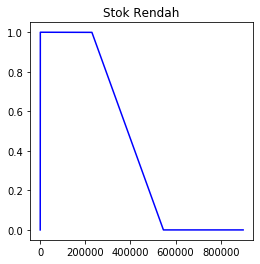

In [55]:
stok_rendah = fuzz.trapmf(stok_x,[1,1,229000,545805])
fig,(ax0) = plt.subplots(nrows=1,figsize=(4,4))
ax0.plot(stok_x,stok_rendah,'blue')
ax0.set_title('Stok Rendah')

<div class="alert alert-success">
	<p>Plot fungsi keanggotaan $\mu stokSedang(x) $</p>
</div>

Fungsi Keanggotaan StokSedang memiliki rentang nilai 229000 - 899755

Text(0.5, 1.0, 'Stok Sedang')

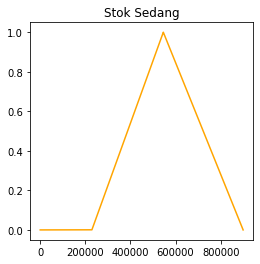

In [58]:
stok_sedang = fuzz.trimf(stok_x,[229000,545805,899755])
fig,(ax0) = plt.subplots(nrows=1,figsize=(4,4))
ax0.plot(stok_x,stok_sedang,'orange')
ax0.set_title('Stok Sedang')

<div class="alert alert-success">
	<p>Plot fungsi keanggotaan $\mu stokTinggi(x) $</p>
</div>

Fungsi Keanggotaan StokTinggi memiliki rentang nilai 545805 - 899755

Text(0.5, 1.0, 'Stok Tinggi')

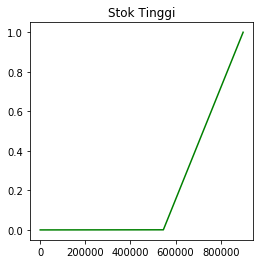

In [60]:
stok_tinggi = fuzz.trimf(stok_x,[545805,899755,899755])
fig,(ax0) = plt.subplots(nrows=1,figsize=(4,4))
ax0.plot(stok_x,stok_tinggi,'green')
ax0.set_title('Stok Tinggi')

<div class="alert alert-success">
	<p>Plot ketiga fungsi keanggotaan Variabel Stok</p>
</div>

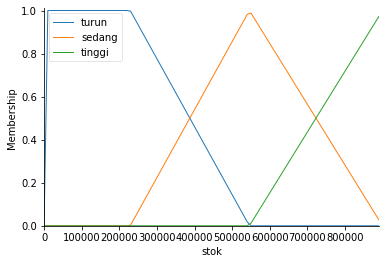

In [61]:
stok.view()

FUZZIFIKASI PENJUALAN
===

In [62]:
penjualan = ctrl.Consequent(np.arange(0,342865,1), 'penjualan')
penjualan_x = np.arange(0,342865,1) #Plotting

Variabel Penjualan memiliki rentang 0 - 342865 dibagi menjadi 3, yakni:
$$Rendah : 1 - 106625$$
$$Sedang : 5925 - 342865$$
$$Naik : 106625 - 342865$$


Dengan fungsi keanggotaan Penjualan

\begin{equation}
  penjualan['rendah'] = \mu penjualanRendah(x)=\begin{cases}
    1, & \text{$x\leq5925$}.\\
    \left.(106625 - x) \,  \right/(106625 - 5925) , & \text{$5925 \leq x \leq 106625$}.\\
    0, & \text{$x\geq 106625$}.
  \end{cases}
  \\
    penjualan['sedang'] = \mu penjualanSedang(x)=\begin{cases}
    0, & \text{$x\leq 5925$ atau $x\geq342865$}.\\
    \left.(x - 5925)\, \right/(106625 - 5925) , & \text{$5925 \leq x \leq 106625$}.\\
    \left.(342865 - x)\, \right/(342865 - 106625) , & \text{$106625 \leq x \leq 342865$}.\\
  \end{cases}
  \\
  tinggi['tinggi'] = \mu penjualanTinggi(x)=\begin{cases}
    0, & \text{$x \leq 106625$}.\\
    \left.(x - 106625) \,  \right/(342685 - 106625) , & \text{$106625 \leq x \leq 342685$}.\\
    1, & \text{$x\geq 342685$}.
  \end{cases}
\end{equation}



In [63]:
penjualan['turun']=fuzz.trapmf(penjualan.universe,[0,1,5925,106625])
penjualan['sedang']=fuzz.trimf(penjualan.universe,[5925,106625,342865])
penjualan['naik']=fuzz.trimf(penjualan.universe,[106625,342865,342865])

Plotting fungsi keanggotaan Penjualan
===

<div class="alert alert-success">
	<p>Plot fungsi keanggotaan $\mu PenjualanRendah(x) $</p>
</div>

Text(0.5, 1.0, 'Penjualan Rendah')

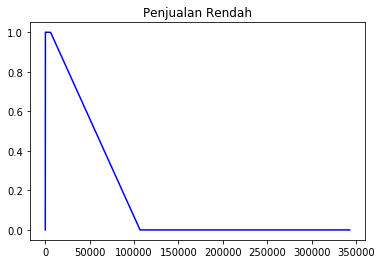

In [64]:
penjualan_rendah = fuzz.trapmf(penjualan_x,[1,1,5925,106625])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,4))
ax0.plot(penjualan_x,penjualan_rendah,'blue')
ax0.set_title('Penjualan Rendah')

<div class="alert alert-success">
	<p>Plot fungsi keanggotaan $\mu PenjualanSedang(x) $</p>
</div>

Text(0.5, 1.0, 'Penjualan Sedang')

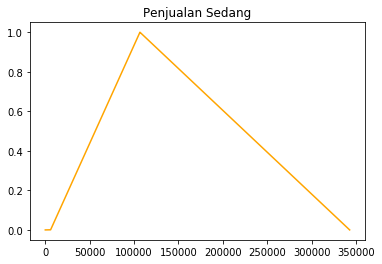

In [65]:
penjualan_sedang = fuzz.trimf(penjualan_x,[5925,106625,342865])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,4))
ax0.plot(penjualan_x,penjualan_sedang,'orange')
ax0.set_title('Penjualan Sedang')

<div class="alert alert-success">
	<p>Plot fungsi keanggotaan $\mu PenjualanNaik(x) $</p>
</div>

Text(0.5, 1.0, 'Penjualan Naik')

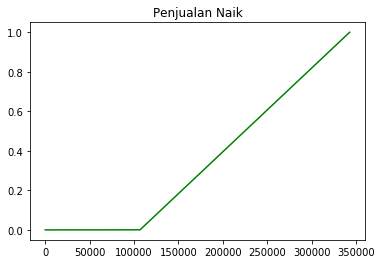

In [66]:
penjualan_Naik = fuzz.trimf(penjualan_x,[106625,342865,342865])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,4))
ax0.plot(penjualan_x,penjualan_Naik,'green')
ax0.set_title('Penjualan Naik')

<div class="alert alert-success">
	<p>Plotting ketiga Fungsi Keanggotaan Penjualan</p>
</div>

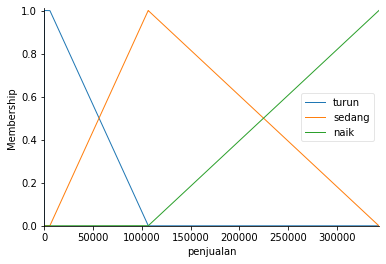

In [67]:
penjualan.view()

# Inferencing
Pada tahap inferencing, membuat aturan-aturan fuzzy yang dinyatakan dalam bentuk IF ... THEN ...

Pada sistem ini berdasarkan jumlah fuzzifikasi dari variabel permintaan yang berjumlah 3 dan fuzzifikasi dari variabel stok yang berjumlah 3, maka rule yang dibuat berjumlah 3 x 3 = 9 rule

<div class="alert alert-success">
	<ol>
		<li>IF Permintaan RENDAH dan Stok TINGGI THEN Penjualan TURUN</li>
		<li>IF Permintaan RENDAH dan Stok SEDANG THEN Penjualan TURUN</li>
		<li>IF Permintaan RENDAH dan Stok RENDAH THEN Penjualan TURUN</li><br>
		<li>IF Permintaan SEDANG dan Stok TINGGI THEN Penjualan TURUN</li>
		<li>IF Permintaan SEDANG dan Stok SEDANG THEN Penjualan SEDANG</li>
		<li>IF Permintaan SEDANG dan Stok RENDAH THEN Penjualan NAIK</li><br>
		<li>IF Permintaan TINGGI dan Stok TINGGI THEN Penjualan NAIK</li>
		<li>IF Permintaan TINGGI dan Stok SEDANG THEN Penjualan NAIK</li>
		<li>IF Permintaan TINGGI dan Stok RENDAH THEN Penjualan NAIK</li>
	</ol>
</div>

In [68]:
rule1 = ctrl.Rule(permintaan['rendah']&stok['tinggi'],penjualan['turun'])
rule2 = ctrl.Rule(permintaan['rendah']&stok['sedang'],penjualan['turun'])
rule3 = ctrl.Rule(permintaan['rendah']&stok['turun'],penjualan['turun'])

rule4 = ctrl.Rule(permintaan['sedang']&stok['tinggi'],penjualan['turun'])
rule5 = ctrl.Rule(permintaan['sedang']&stok['sedang'],penjualan['sedang'])
rule6 = ctrl.Rule(permintaan['sedang']&stok['turun'],penjualan['naik'])

rule7 = ctrl.Rule(permintaan['tinggi']&stok['tinggi'],penjualan['naik'])
rule8 = ctrl.Rule(permintaan['tinggi']&stok['sedang'],penjualan['naik'])
rule9 = ctrl.Rule(permintaan['tinggi']&stok['turun'],penjualan['naik'])

RULE EVALUATION
===

In [69]:
penjualan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

DEFUZZIFIKASI
===

In [70]:
jual = ctrl.ControlSystemSimulation(penjualan_ctrl)

Memasukan Input

In [71]:
jual.input['permintaan'] = 34000 
jual.input['stok'] = 600000

Melakukan perhitungan defuzzifikasi

In [72]:
jual.compute()

Mencetak hasil output defuzzifikasi

In [73]:
print(jual.output['penjualan'])

142192.02727706148


<div class="alert alert-success">
  <p>Plotting fungsi keanggotaan permintaan setelah dimasukkan input nilai pada permintaan</p>
</div>

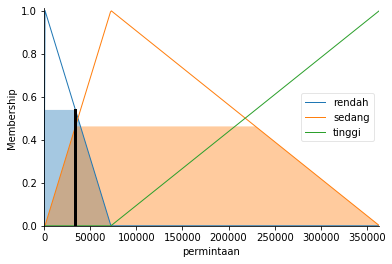

In [74]:
permintaan.view(sim=jual)

<div class="alert alert-success">
  <p>Plotting fungsi keanggotaan Stok setelah dimasukkan input nilai pada Stok</p>
</div>

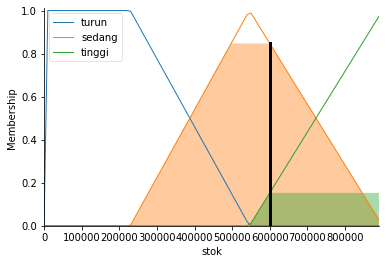

In [75]:
stok.view(sim=jual)

<div class="alert alert-success">
  <p>Plotting fungsi keanggotaan Penjualan setelah dilakukan perhitungan defuzzifikasi output nilai pada Penjualan
</p>
</div>

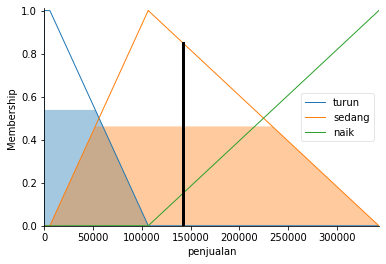

In [76]:
penjualan.view(sim=jual)

plt.show()

PERHITUNGAN MANUAL
===

\begin{equation}
Permintaan = 34000 \\
    Masukkan\,nilai\,Permintaan\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,Permintaan\\
  permintaan['rendah'] = \mu Rendah(x)=\begin{cases}
    1, & \text{$x\leq1000$}.\\
    (72475 - x)/(72475-1000) , & \text{$1000 \leq x \leq 72475$}. \checkmark \\
    0, & \text{$x\geq 72475$}.
  \end{cases}
  \\
  permintaan['sedang'] = \mu Sedang(x)=\begin{cases}
    0, & \text{$x\leq 1000$ atau $x\geq363725$}.\\
    (x - 1000)/(72475 - 1000) , & \text{$1000 \leq x \leq 72475$}. \checkmark\\
    (363725 - x)/(363725 - 72475) , & \text{$72475 \leq x \leq 363725$}.\\
  \end{cases}
  \\
    permintaan['tinggi'] = \mu Tinggi(x)=\begin{cases}
    0, & \text{$x\leq 72475$}.\checkmark \\
    (x - 72475)/(363725 - 72475) , & \text{$72475 \leq x \leq 363725$}.\\
    1, & \text{$x\geq 363725$}.
  \end{cases}
\end{equation}

\begin{equation}
    \mu PermintaanRendah(34000) = (72475 - 34000) / (72475 - 1000) \\
    \mu PermintaanRendah(34000) = 34475/71475 \\ 
    \mu PermintaanRendah(34000) = 0.53 \\
    \mu PermintaanSedang(34000) = (34000 - 1000) / (72475-1000) \\
    \mu PermintaanSedang(34000) = 34/72.475 \\
    \mu PermintaanSedang(34000) = 0.46 \\
\end{equation}

\begin{equation}
Stok = 600000 \\
Masukkan\,nilai\,Stok\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,Stok\\
  stok['rendah'] = \mu stokRendah(x)=\begin{cases}
    1, & \text{$x\leq229000$}.\\
    \left.(545805 - x) \,  \right/(545805 - 229000) , & \text{$229000 \leq x \leq 545805$}.\\
    0, & \text{$x\geq 545805$}.\checkmark
  \end{cases}
  \\
    stok['sedang'] = \mu stokSedang(x)=\begin{cases}
    0, & \text{$x\leq 229000$ atau $x\geq899755$}.\\
    \left.(x - 229000)\, \right/(545805 - 229000) , & \text{$229000 \leq x \leq 545805$}.\\
    \left.(899755 - x)\, \right/(899755 - 545805) , & \text{$545805 \leq x \leq 899755$}.\checkmark\\
  \end{cases}
  \\
  stok['tinggi'] = \mu stokTinggi(x)=\begin{cases}
    0, & \text{$x \leq 545805$}.\\
    \left.(x - 545805) \,  \right/(899755 - 545805) , & \text{$545805 \leq x \leq 899755$}.\checkmark\\
    1, & \text{$x\geq 899755$}.
  \end{cases}
\end{equation}


\begin{equation}
    \mu StokSedang(600000) = (899755 - 600000) / (899755 - 545805) \\
    \mu StokSedang(600000) = 299755/353950 \\ 
    \mu StokSedang(600000) = 0.84 \\
    \mu StokTinggi(600000) = (600000 - 545805) / (899755-545805) \\
    \mu StokTinggi(600000) = 54195/353950 \\
    \mu StokTinggi(600000) = 0.15 \\
\end{equation}


=======================================================================================================================

Lalu kita cari nilai z untuk setiap aturan dengan menggunakan fungsi MIN karena menggunakan rule AND
1. IF Permintaan RENDAH dan Stok TINGGI THEN Penjualan TURUN

$$ \\ \alpha(predikat_1) = \mu PermintaanRendah \cap \mu StokTinggi $$
$$\alpha(predikat_1)   = min (\mu PermintaanRendah[34000], \mu StokTinggi[600000]) $$
$$ \alpha(predikat_1) = min (0.53; 0.15) $$
$$ \alpha(predikat_1) = 0.15 $$

Lalu lihat himpunan Penjualan Turun

\begin{equation}
  penjualan['Rendah'] = \mu penjualanRendah(x)=\begin{cases}
    1, & \text{$x\leq5925$}.\\
    \left.(106625 - x) \,  \right/(106625 - 5925) , & \text{$5925 \leq x \leq 106625$}.\\
    0, & \text{$x\geq 106625$}.
  \end{cases}
\end{equation}

Terdapat 1 nilai keanggotaan yang akan kita masukkan nilainya
$$
(106625-x) / (106625-5925) = 0.15 \\
(106625-x) = 15105 \\ 
-x = -91520\\
x = 91520 \\
$$

Maka nilai Z$_1$ = 91520

-------------------------------------------------------------------------------------------------------

2. IF Permintaan RENDAH dan Stok SEDANG THEN Penjualan TURUN

$$ \\ \alpha(predikat_2) = \mu PermintaanRendah \cap \mu StokSedang $$
$$\alpha(predikat_2)   = min (\mu PermintaanRendah[34000], \mu StokSedang[600000]) $$
$$ \alpha(predikat_2) = min (0.53; 0.84) $$
$$ \alpha(predikat_2) = 0.53 $$

Lalu lihat himpunan Penjualan Turun

\begin{equation}
  penjualan['Rendah'] = \mu penjualanRendah(x)=\begin{cases}
    1, & \text{$x\leq5925$}.\\
    \left.(106625 - x) \,  \right/(106625 - 5925) , & \text{$5925 \leq x \leq 106625$}.\\
    0, & \text{$x\geq 106625$}.
  \end{cases}
\end{equation}

Terdapat 1 nilai keanggotaan yang akan kita masukkan nilainya
$$
(106625-x) / (106625-5925) = 0.53 \\
(106625-x) = 53371 \\ 
-x = -53254‬\\
x = 53254 \\
$$

Maka nilai Z$_2$ = 53254

----------------------------------------------------------------------------------------------------

3. IF Permintaan RENDAH dan Stok RENDAH THEN Penjualan TURUN

$$ \\ \alpha(predikat_3) = \mu PermintaanRendah \cap \mu StokRendah $$
$$\alpha(predikat_3)   = min (\mu PermintaanRendah[34000], \mu StokRendah[600000]) $$
$$ \alpha(predikat_3) = min (0.53; 0) $$
$$ \alpha(predikat_3) = 0 $$

\begin{equation}
  penjualan['rendah'] = \mu penjualanRendah(x)=\begin{cases}
    1, & \text{$x\leq5925$}.\\
    \left.(106625 - x) \,  \right/(106625 - 5925) , & \text{$5925 \leq x \leq 106625$}.\\
    0, & \text{$x\geq 106625$}.
  \end{cases}
  \end{equation}
  
  Maka nilai Z$_3$ = 0
  
  
  ----

4. IF Permintaan SEDANG dan Stok TINGGI THEN Penjualan TURUN

-------------------------------------------------------------------------------------------------------
$$ \\ \alpha(predikat_4) = \mu PermintaanSedang \cap \mu StokTinggi $$
$$\alpha(predikat_4)   = min (\mu PermintaanSedang[34000], \mu StokTinggi[600000]) $$
$$ \alpha(predikat_4) = min (0.46; 0.15) $$
$$ \alpha(predikat_4) = 0.15 $$

Lalu lihat himpunan Penjualan Turun

\begin{equation}
  penjualan['Rendah'] = \mu penjualanRendah(x)=\begin{cases}
    1, & \text{$x\leq5925$}.\\
    \left.(106625 - x) \,  \right/(106625 - 5925) , & \text{$5925 \leq x \leq 106625$}.\\
    0, & \text{$x\geq 106625$}.
  \end{cases}
\end{equation}

Terdapat 1 nilai keanggotaan yang akan kita masukkan nilainya
$$
(106625-x) / (106625-5925) = 0.15 \\
(106625-x) = 15105‬ \\
-x = -91520\\
x = 91520 \\
$$

Maka nilai Z$_4$ = 91520

5. IF Permintaan SEDANG dan Stok SEDANG THEN Penjualan SEDANG
-------------------------------------------------------------------------------------------------------
$$ \\ \alpha(predikat_5) = \mu PermintaanSedang \cap \mu StokSedang $$
$$\alpha(predikat_5)   = min (\mu PermintaanSedang[34000], \mu StokSedang[600000]) $$
$$ \alpha(predikat_5) = min (0.46; 0.84) $$
$$ \alpha(predikat_5) = 0.46 $$

Lalu lihat himpunan Penjualan Sedang

\begin{equation}
    penjualan['sedang'] = \mu penjualanSedang(x)=\begin{cases}
    0, & \text{$x\leq 5925$ atau $x\geq342865$}.\\
    \left.(x - 5925)\, \right/(106625 - 5925) , & \text{$5925 \leq x \leq 106625$}.\\
    \left.(342865 - x)\, \right/(342865 - 106625) , & \text{$106625 \leq x \leq 342865$}.\\
  \end{cases}
\end{equation}

Terdapat 2 nilai keanggotaan yang akan kita masukkan nilainya
$$
(x - 5925)/(106625 - 5925) = 0.46 \\
(x - 5925) = 46322‬‬ \\ 
x = 522477‬ \\
$$

$$
(342865 - x)/(342865 - 106625) = 0.46 \\
(342865 - x) = 125107‬ \\ 
-x2 = 217658 \\
x2 = 217658 \\
$$

Maka nilai Z$_5$ = 217658‬

---
6. IF Permintaan SEDANG dan Stok RENDAH THEN Penjualan NAIK

$$ \\ \alpha(predikat_6) = \mu PermintaanSedang \cap \mu StokRendah $$
$$\alpha(predikat_6)   = min (\mu PermintaanSedang[34000], \mu StokRendah[600000]) $$
$$ \alpha(predikat_6) = min (0.46; 0) $$
$$ \alpha(predikat_6) = 0 $$

Lalu lihat himpunan Penjualan NAIK

\begin{equation}
Penjualan['tinggi'] = \mu penjualanTinggi(x)=\begin{cases}
    0, & \text{$x \leq 106625$}.\\
    \left.(x - 106625) \,  \right/(342685 - 106625) , & \text{$106625 \leq x \leq 342685$}.\\
    1, & \text{$x\geq 342685$}.
  \end{cases}
\end{equation}

Maka nilai Z$_6$ = 0


-------
7. IF Permintaan TINGGI dan Stok TINGGI THEN Penjualan NAIK

$$ \\ \alpha(predikat_7) = \mu PermintaanTinggi \cap \mu StokTinggi $$
$$\alpha(predikat_7)   = min (\mu PermintaanTinggi[34000], \mu StokTinggi[600000]) $$
$$ \alpha(predikat_7) = min (0; 0.15) $$
$$ \alpha(predikat_7) = 0 $$

Lalu lihat himpunan Penjualan NAIK

\begin{equation}
Penjualan['tinggi'] = \mu penjualanTinggi(x)=\begin{cases}
    0, & \text{$x \leq 106625$}.\\
    \left.(x - 106625) \,  \right/(342685 - 106625) , & \text{$106625 \leq x \leq 342685$}.\\
    1, & \text{$x\geq 342685$}.
  \end{cases}
\end{equation}

Maka nilai Z$_7$ = 0

----
8. IF Permintaan TINGGI dan Stok SEDANG THEN Penjualan NAIK

$$ \\ \alpha(predikat_8) = \mu PermintaanTinggi \cap \mu StokSedang $$
$$\alpha(predikat_8)   = min (\mu PermintaanTinggi[34000], \mu StokSedang[600000]) $$
$$ \alpha(predikat_8) = min (0; 0.84) $$
$$ \alpha(predikat_8) = 0 $$

Lalu lihat himpunan Penjualan NAIK

\begin{equation}
Penjualan['tinggi'] = \mu penjualanTinggi(x)=\begin{cases}
    0, & \text{$x \leq 106625$}.\\
    \left.(x - 106625) \,  \right/(342685 - 106625) , & \text{$106625 \leq x \leq 342685$}.\\
    1, & \text{$x\geq 342685$}.
  \end{cases}
\end{equation}

Maka nilai Z$_8$ = 0

----
9. IF Permintaan TINGGI dan Stok RENDAH THEN Penjualan NAIK

$$ \\ \alpha(predikat_9) = \mu PermintaanTinggi \cap \mu StokSedang $$
$$\alpha(predikat_9)   = min (\mu PermintaanTinggi[34000], \mu StokSedang[600000]) $$
$$ \alpha(predikat_9) = min (0; 0) $$
$$ \alpha(predikat_9) = 0 $$

Lalu lihat himpunan Penjualan NAIK

\begin{equation}
Penjualan['tinggi'] = \mu penjualanTinggi(x)=\begin{cases}
    0, & \text{$x \leq 106625$}.\\
    \left.(x - 106625) \,  \right/(342685 - 106625) , & \text{$106625 \leq x \leq 342685$}.\\
    1, & \text{$x\geq 342685$}.
  \end{cases}
\end{equation}

Maka nilai Z$_9$ = 0

==================================================================================================================<br>
Dari sini kita dapat mencari nilai Z yaitu:





Z =$$ \frac{\alpha predikat_1 \times Z_1 +
\alpha predikat_2 \times Z_2 +
\alpha predikat_3 \times Z_3 +
\alpha predikat_4 \times Z_4 +
\alpha predikat_5 \times Z_5 +
\alpha predikat_6 \times Z_6 +
\alpha predikat_7 \times Z_7 +
\alpha predikat_8 \times Z_8 +
\alpha predikat_9 \times Z_9 }
{\alpha predikat_1 + \alpha predikat_2 +
\alpha predikat_3 + \alpha predikat_4 +
\alpha predikat_5 + \alpha predikat_6 +
\alpha predikat_7 + \alpha predikat_8 +
\alpha predikat_9}$$

 $$Z = \frac{0.15 \times 91520 + 0.53 \times 53254 + 0 + 0.15 \times 91520 + 0.46 * 217658}{0.15 + 0.53 + 0 + 0.15 + 0.46 + 0 + 0 + 0 +0} $$
 
 $$ Z = \frac{155803,3
}{1,29} $$
 $$ Z = 120777,8 $$

Hasil output yang dikeluarkan menggunakan code python sebesar 142192,0 sedangkan perhitungan manual sebesar 120777,8.
Terdapat perbedaan sebesar 6,24%